In [1]:
!pip install tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 6.2 kB/s 
     |████████████████████████████████| 6.0 MB 11.8 MB/s 
     |████████████████████████████████| 1.7 MB 34.0 MB/s 
     |████████████████████████████████| 439 kB 52.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully 

In [2]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #convolutional Layer
from keras.utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

# **Load data**

In [3]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

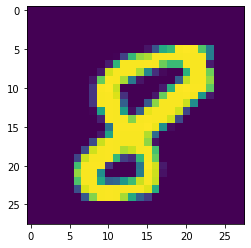

In [6]:
plt.imshow(x_train[6957])     #ploting the index=image

In [7]:
np.argmax(y_train[6957])

0

# **Reshaping Dataset**


In [8]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

# **Applying One Hot Encoding**

In [9]:
number_of_classes = 10  #storing the no of classes in a variable

In [10]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

# **Add CNN Layers**


In [11]:
#create model
model=Sequential ()

In [12]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [13]:
#flatten the dimension of the image
model.add(Flatten())

In [14]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

# **Compiling the model**

In [15]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [16]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

# **Train the model**

In [17]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 203s 108ms/step - loss: 0.1969 - accuracy: 0.9522 - val_loss: 0.0825 - val_accuracy: 0.9752
Epoch 2/5
1875/1875 [==============================] - 202s 108ms/step - loss: 0.0647 - accuracy: 0.9800 - val_loss: 0.0854 - val_accuracy: 0.9752
Epoch 3/5
1875/1875 [==============================] - 206s 110ms/step - loss: 0.0447 - accuracy: 0.9854 - val_loss: 0.0909 - val_accuracy: 0.9758
Epoch 4/5
1875/1875 [==============================] - 203s 108ms/step - loss: 0.0351 - accuracy: 0.9890 - val_loss: 0.1153 - val_accuracy: 0.9748
Epoch 5/5
1875/1875 [==============================] - 204s 109ms/step - loss: 0.0294 - accuracy: 0.9912 - val_loss: 0.1025 - val_accuracy: 0.9768


# **Observing the metrics**


In [18]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.10253170132637024, 0.9768000245094299]


# **Test The Model**

In [19]:
prediction=model.predict(x_test[6958:6959])
print(prediction)

1/1 [==============================] - 0s 121ms/step
[[2.27421380e-11 2.52288923e-09 1.40757657e-11 1.37507766e-11
  7.95721182e-13 1.05805156e-11 5.38871012e-17 2.82220509e-13
  1.00000000e+00 2.48312601e-13]]


In [24]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[8]


In [25]:

np.argmax(y_test[6958:6959]) #printing the actual labels

8

# **Save The model**

In [27]:
pwd

'/content'

In [28]:
# Save the model
model.save('models/trainedModel.h5')

In [29]:
cd models

/content/models


In [30]:
!tar -zcvf handwritten-digit-recognition-model_new.tgz trainedModel.h5

trainedModel.h5


In [31]:
!pip install watson-machine-learning-client --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 5.3 MB/s 
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 132 kB 65.4 MB/s 
     |████████████████████████████████| 9.9 MB 58.6 MB/s 
     |████████████████████████████████| 79 kB 7.7 MB/s 
     |████████████████████████████████| 140 kB 46.5 MB/s 
     |████████████████████████████████| 956 kB 48.4 MB/s 
     |████████████████████████████████| 135 kB 56.0 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73931 sha256=5aa76a1060da178299c00c49d0fc0ff8d9250cb4e4b721dd18a1533982d72457
  Stored in directory: /root/.cache/pip/wheels/ec/94/29/2b57327cf00664b6614304f7958abd29d77ea0e5bbece2ea57
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562962 sha256=c482f627865

In [1]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.7 MB/s 
     |████████████████████████████████| 51 kB 616 kB/s 
     |████████████████████████████████| 824 kB 53.7 MB/s 
     |████████████████████████████████| 133 kB 53.2 MB/s 
     |████████████████████████████████| 547 kB 32.2 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=daee3aedf9507a8c6faccca19a16543e88e523354b134ad284b801a62d68d6ee
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=445745366972401752441f4764bd657b9d49bfb4d4c8eeaba78d861bade75972
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_

# **Cloud deploy**

In [2]:
from ibm_watson_machine_learning import APIClient

In [22]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"D8Srv7uT285lrVviFfeuRojkgMAk4skG9mqzU5sITq4H"
}


In [8]:
client = APIClient(credentials)
client

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [4]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/13a67f3da8ce47919951df22377d6072:e41a2c17-6365-48c7-9aad-7900251147ba::',
      'guid': 'e41a2c17-6365-48c7-9aad-7900251147ba',
      'name': 'Watson Machine Learning-zw',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'models',
    'scope': {'bss_account_id': '13a67f3da8ce47919951df22377d6072'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '085f21d8-3c76-443d-bf36-98db4a47034d',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': 'f8b976eb7d6e4d9cb51958b2013572b5',
        'api_key': 'K15kMBOBIxW7fvnpp2XmlLYKg8u1qqIpz_zgOGV3KV1o',
        'secret_access_key': '872e2b8ef8636503cc7fbccedc03944bae06ed3c530d81c9',
        'service_id': 'ServiceId-daecd1c8-c197-4144-8cea-44262af8f740'},
       'editor': {'access_key_id': 'fd45821b532e4b52ba371a83332e3a0f',
        'api_key': '4a

In [17]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [ ]:
space_uid = guid_from_space_name(client,'models')
print("Space UID = " + space_uid)

Space UID = 174c9535-90c1-4d38-b3d7-f15cdbf13e67


In [ ]:

client.set.default_space(space_uid)

'SUCCESS'


In [ ]:
client.software_specifications.list(limit=100)

In [ ]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [ ]:
model_details = client.repository.store_model(model='handwritten-digit-recognition-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Handwritten Digit Recognition CNN Model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [ ]:
model_details

In [ ]:
model_id = client.repository.get_model_id(model_details)
model_id

'1822f4ee-3b96-45ba-81df-9921a2c34e96'

In [ ]:
client.repository.download(model_id,'IBM_Digit_Recognizer_model.tar.gz')

Successfully saved model content to file: 'IBM_Digit_Recognizer_model.tar.gz'

In [ ]:
ls

handwritten-digit-recognition-model_new.tgz  trainedModel.h5
IBM_Digit_Recognizer_model.tar.gz

# **TEST MODEL**

In [ ]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [ ]:
model = load_model("trainedModel.h5")

In [ ]:
model


In [ ]:
img = Image.open(streaming_body_2).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [ ]:
img


In [ ]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [ ]:
pred = model.predict(im2arr)
print(pred)


1/1 [==============================] - 0s 22ms/step
[[1.0139505e-09 7.3190647e-14 5.1109399e-12 9.9999976e-01 9.6466547e-18
  2.6833868e-07 2.4949229e-13 3.3784953e-14 2.4141853e-09 2.5182673e-10]]


In [ ]:
print(np.argmax(pred, axis=1)) #printing our Labels

[3]